## Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data_train = pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Virtual Competition 2\train_ctrUa4K.csv')
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_test = pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Virtual Competition 2\test_lAUu6dG.csv')
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Exploratory Data Analysis On Train Data

In [4]:
data_train.shape

(614, 13)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Exploratory Data Analysis On Test Data

In [8]:
data_test.shape

(367, 12)

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Handling Missing Values Of Train Data

In [12]:
data_train=data_train.drop('Loan_ID', axis = 1)

In [13]:
data_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
miss_val_data = data_train.isnull().sum()
miss_val_data[miss_val_data>0].sort_values(ascending = False)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [15]:
data_train['Credit_History'].fillna(0, inplace=True)
data_train['Self_Employed'].fillna('No', inplace=True)
data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean(), inplace=True)
data_train['Dependents'].fillna('Other', inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['LoanAmount'].mode()[0], inplace=True)
data_train['Gender'].fillna('Others', inplace=True)
data_train['Married'].fillna('No', inplace=True)

In [16]:
data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encodeing train data

In [17]:
df1 = data_train.copy()

In [18]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Married'] = label_encoder.fit_transform(df1['Married'])
df1['Education'] = label_encoder.fit_transform(df1['Education'])
df1['Dependents'] = label_encoder.fit_transform(df1['Dependents'])
df1['Self_Employed'] = label_encoder.fit_transform(df1['Self_Employed'])
df1['Property_Area'] = label_encoder.fit_transform(df1['Property_Area'])
df1['Loan_Status'] = label_encoder.fit_transform(df1['Loan_Status'])

## Checking Outliers

<Axes: xlabel='ApplicantIncome'>

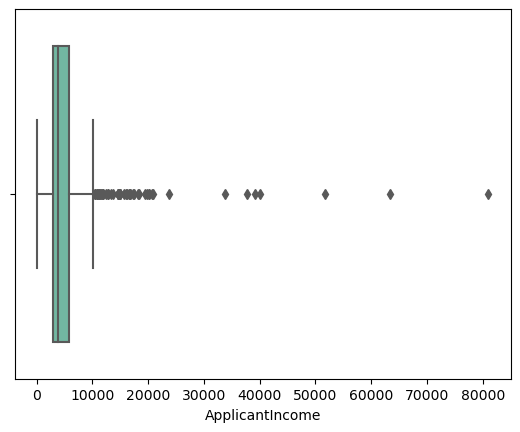

In [20]:
sns.boxplot(x=df1['ApplicantIncome'],palette='Set2')

<Axes: xlabel='CoapplicantIncome'>

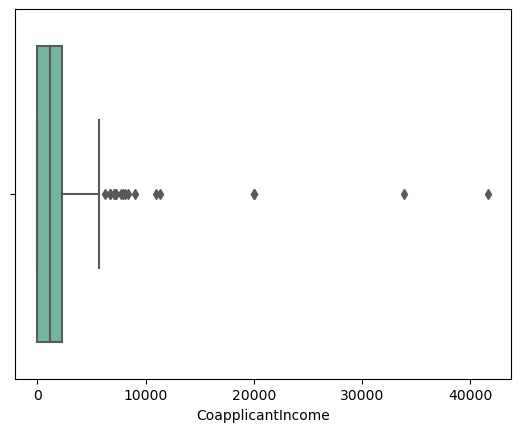

In [21]:
sns.boxplot(x=df1['CoapplicantIncome'],palette='Set2')

<Axes: xlabel='LoanAmount'>

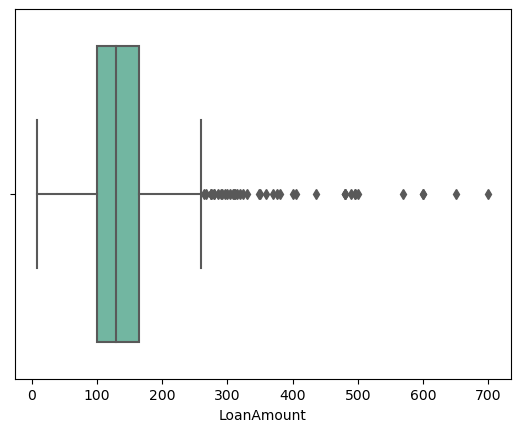

In [22]:
sns.boxplot(x=df1['LoanAmount'],palette='Set2')

## Handling Outliers

In [23]:
z_scores = stats.zscore(df1)

In [24]:
threshold = 3
data_clipped = df1[(z_scores < threshold).all(axis=1)]

## Balanced Class Data

<Axes: xlabel='Loan_Status', ylabel='count'>

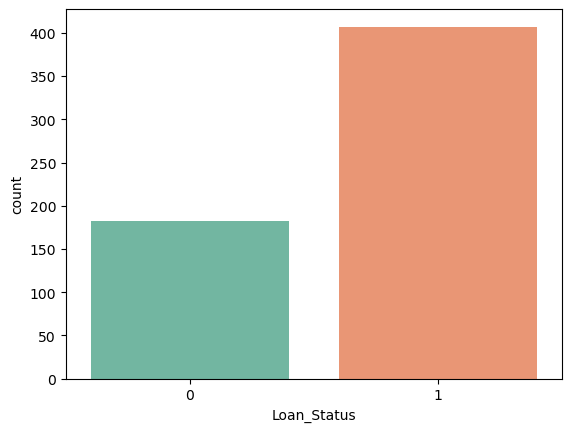

In [25]:
sns.countplot(data=data_clipped, x='Loan_Status', palette='Set2')

In [26]:
from sklearn.utils import resample

In [27]:
df_majority = data_clipped[(data_clipped['Loan_Status']==1)]
df_minority = data_clipped[(data_clipped['Loan_Status']==0)]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples = 6282,
                                random_state=0)

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

## Data Correlation 

<Axes: >

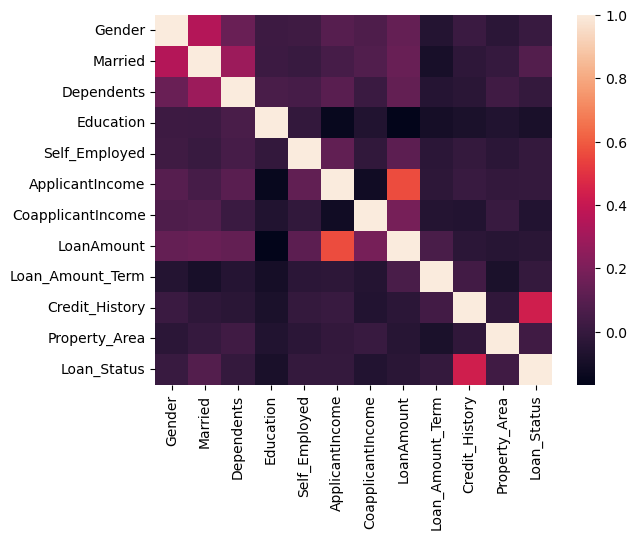

In [28]:
sns.heatmap(df1.corr())

## Modeling train data

In [29]:
x = df_upsampled.drop(columns = ['Loan_Status'])
y = df_upsampled['Loan_Status']

In [30]:
scalar = StandardScaler()

In [31]:
x = scalar.fit_transform(x)

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [34]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

K-Nearest Neighbors Accuracy: 0.9716
Support Vector Machine Accuracy: 0.9559
Decision Tree Accuracy: 0.9858
Random Forest Accuracy: 0.9873
Logistic Regression Accuracy: 0.9447


## Cross validation

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
rf_model = RandomForestClassifier()

In [37]:
dt_model = DecisionTreeClassifier()

In [38]:
kfold_validator  = KFold(10)
cv_result1 = cross_val_score(rf_model,x,y,cv = kfold_validator)
cv_result1

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.39071856])

In [39]:
cv_result1.mean()

0.9390718562874252

In [40]:
kfold_validator  = KFold(10)
cv_result2 = cross_val_score(dt_model,x,y,cv = kfold_validator)
cv_result2

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.39071856])

In [41]:
cv_result2.mean()

0.9390718562874252

## Hyperparameter Tuning of Random Forest

In [42]:
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [43]:
model_rf = RandomForestClassifier() 
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [45]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [46]:
model_grid = RandomForestClassifier(max_depth=6, 
                                    max_features=None, 
                                    max_leaf_nodes=9, 
                                    n_estimators=25) 

In [47]:
model_grid.fit(x_train, y_train) 
y_pred_grid = model_grid.predict(x_val) 
accuracy = accuracy_score(y_val, y_pred_grid)

In [48]:
accuracy

0.9446935724962631

## Hyperparameter Tuning of Decision Tree

In [49]:
param_grid = {
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Example values for min_samples_leaf
}

In [50]:
grid_search2 = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy') 
grid_search2.fit(x_train, y_train) 
print(grid_search2.best_estimator_)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)


In [51]:
dt_model_grid = RandomForestClassifier(max_depth=7,
                                       min_samples_leaf=2, 
                                       min_samples_split=10
                                        )

In [52]:
dt_model_grid.fit(x_train, y_train) 
y_pred_grid2 = dt_model_grid.predict(x_val) 
accuracy2 = accuracy_score(y_val, y_pred_grid2)
accuracy2

0.945440956651719

## Preprocessing Test Data

In [53]:
df2 = data_test.copy()

In [54]:
df2 = data_test.drop('Loan_ID', axis = 1)

## Hadling missing values of test data

In [55]:
miss_val_data = df2.isnull().sum()
miss_val_data[miss_val_data>0].sort_values(ascending = False)

Credit_History      29
Self_Employed       23
Gender              11
Dependents          10
Loan_Amount_Term     6
LoanAmount           5
dtype: int64

In [56]:
df2['Credit_History'].fillna(df2['Credit_History'].mode()[0], inplace=True)
df2['Self_Employed'].fillna('No', inplace=True)
df2['Gender'].fillna('Others', inplace=True)
df2['Dependents'].fillna('Unknown', inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean(), inplace=True)
df2['LoanAmount'].fillna(df2['LoanAmount'].mean(), inplace=True)

In [57]:
miss_val_data = df2.isnull().sum()
miss_val_data[miss_val_data>0].sort_values(ascending = False)

Series([], dtype: int64)

## Encodeing test data

In [58]:
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2['Married'] = label_encoder.fit_transform(df2['Married'])
df2['Education'] = label_encoder.fit_transform(df2['Education'])
df2['Dependents'] = label_encoder.fit_transform(df2['Dependents'])
df2['Self_Employed'] = label_encoder.fit_transform(df2['Self_Employed'])
df2['Property_Area'] = label_encoder.fit_transform(df2['Property_Area'])

## Prediction Using Decision Tree Model

In [60]:
dt_model_grid.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10)

In [61]:
predicted_loan_status = dt_model_grid.predict(df2)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [62]:
predicted_loan_status

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [63]:
def convert_to_category(prediction):
    if prediction == 1:
        return 'Y'
    else:
        return 'N'

In [68]:
categorical_predictions = [convert_to_category(pred) for pred in predicted_loan_status]

In [65]:
predictions = pd.DataFrame({'Loan_ID': data_test['Loan_ID'], 'Loan_Status': categorical_predictions})
predictions

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [66]:
predictions.to_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Virtual Competition 2\loan_predictions15.csv', index=False)